In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('DJI-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,10548.509766,10555.009766,10423.129883,10428.049805,10428.049805,137940000
1,2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2,2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
3,2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
4,2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 740):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
680/680 [==============================] - 4s 6ms/step - loss: 0.0641
Epoch 2/100
680/680 [==============================] - 3s 4ms/step - loss: 0.0153
Epoch 3/100
680/680 [==============================] - 3s 4ms/step - loss: 0.0094
Epoch 4/100
680/680 [==============================] - 3s 4ms/step - loss: 0.0093
Epoch 5/100
680/680 [==============================] - 3s 4ms/step - loss: 0.0089
Epoch 6/100
680/680 [==============================] - 3s 4ms/step - loss: 0.0087
Epoch 7/100
680/680 [==============================] - 4s 5ms/step - loss: 0.0083
Epoch 8/100
680/680 [==============================] - 4s 5ms/step - loss: 0.0076
Epoch 9/100
680/680 [==============================] - 4s 5ms/step - loss: 0.0073
Epoch 10/100
680/680 [==============================] - 4s 5ms/step - loss: 0.0077
Epoch 11/100
680/680 [==============================] - 4s 5ms/step - loss: 0.0075
Epoch 12/100
680/680 [==============================] - 4s 5ms/step - loss: 0.0070
Epoch 13/100


In [14]:
dataset_test = pd.read_csv('DJI-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 260):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<IPython.core.display.Javascript object>


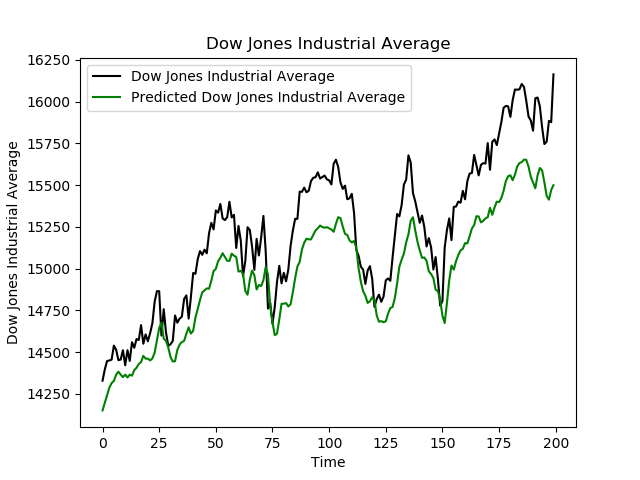

In [15]:
plt.plot(real_stock_price, color = 'black', label = 'Dow Jones Industrial Average')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Dow Jones Industrial Average')
plt.title('Dow Jones Industrial Average')
plt.xlabel('Time')
plt.ylabel('Dow Jones Industrial Average')
plt.legend()
plt.show()